**Graph Plot**

In [1]:
'''
Author: Rohit Sharma
Date: 19/01/2021
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.metrics import mean_squared_error
import math

In [34]:
df = pd.read_excel('C:\\cygwin64\\home\\Grid_data_IMD_Final\\diff_months\\aug_2020\\min_max29\\max_comparison.xlsx', 'Sheet2')
df.head(10)

,lat,lon,ind_lat_lon,imd,IDW,bilinear,boxavg,aave,bessel
0,7.5,93.5,0,31.815086,31.815086,NaN,31.815086,31.815086,NaN
1,7.5,94.0,0,31.819885,31.812988,NaN,31.815086,31.815086,NaN
2,8.0,77.0,1,32.734340,33.309700,NaN,33.309700,NaN,NaN
3,8.0,77.5,1,33.263527,33.309700,NaN,33.309700,33.309700,NaN
4,8.0,93.0,0,31.805935,31.811674,NaN,31.811680,NaN,NaN
5,8.0,93.5,0,31.816368,31.811676,NaN,31.811680,31.811677,NaN
6,8.5,73.0,0,32.494670,32.499886,NaN,NaN,NaN,NaN
7,8.5,76.5,0,33.339620,33.309700,NaN,33.309700,NaN,NaN
8,8.5,77.0,1,32.756073,32.988842,NaN,33.309700,33.309700,NaN
9,8.5,77.5,1,33.309700,33.309700,NaN,NaN,33.309700,NaN


In [35]:
data = df[['imd', 'IDW', 'bilinear', 'boxavg', 'aave', 'bessel']]
data

,imd,IDW,bilinear,boxavg,aave,bessel
0,31.815086,31.815086,NaN,31.815086,31.815086,NaN
1,31.819885,31.812988,NaN,31.815086,31.815086,NaN
2,32.734340,33.309700,NaN,33.309700,NaN,NaN
3,33.263527,33.309700,NaN,33.309700,33.309700,NaN
4,31.805935,31.811674,NaN,31.811680,NaN,NaN
...,...,...,...,...,...,...
1388,23.017330,23.017330,23.017815,23.017839,23.017330,NaN
1389,24.631440,24.631817,24.631039,24.631039,24.631803,24.631810
1390,24.638630,24.355167,24.636333,24.636333,24.638469,24.638474
1391,24.646765,23.828144,24.641628,24.641628,23.828145,23.828145


**Total Entries**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lat          1393 non-null   float64
 1   lon          1393 non-null   float64
 2   ind_lat_lon  1393 non-null   int64  
 3   imd          1393 non-null   float64
 4   IDW          1384 non-null   float64
 5   bilinear     504 non-null    float64
 6   boxavg       741 non-null    float64
 7   aave         1327 non-null   float64
 8   bessel       1131 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 98.1 KB


**Missing Values**

In [37]:
m = 0

In [38]:
#IDW
m1 = df['imd'].count() - df['IDW'].count()
m1

9

In [39]:
#bilinear
m2 = df['imd'].count() - df['bilinear'].count()
m2

889

In [40]:
#boxavg
m3 = df['imd'].count() - df['boxavg'].count()
m3

652

In [41]:
#aave
m4 = df['imd'].count() - df['aave'].count()
m4

66

In [42]:
#bessel
m5 = df['imd'].count() - df['bessel'].count()
m5

262

**RMSE**

In [43]:
#rms = 0

In [44]:
df['IDW'] = df['IDW'].fillna(0)
df['IDW'].count()

1393

In [45]:
#IDW
actual = df['imd']
predicted = df['IDW']

mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

print('Root mean square error for IDW(CDO)_max_temp: ', rmse)

Root mean square error for IDW(CDO)_max_temp:  2.6848401943517466


In [46]:
df['bilinear'] = df['bilinear'].fillna(0)
df['bilinear'].count()

1393

In [47]:
#bilinear
actual1 = df['imd']
predicted1 = df['bilinear'].dropna()

mse = mean_squared_error(actual1, predicted1)
rmse1 = math.sqrt(mse)

print('Root mean square error for bilinear(CDO/grads)_max_temp: ', rmse1)

Root mean square error for bilinear(CDO/grads)_max_temp:  24.56789984173033


In [48]:
df['boxavg'] = df['boxavg'].fillna(0)
df['boxavg'].count()

1393

In [49]:
#boxavg
actual1 = df['imd']
predicted1 = df['boxavg'].dropna()

mse = mean_squared_error(actual1, predicted1)
rmse2 = math.sqrt(mse)

print('Root mean square error for boxavg(grads)_max_temp: ', rmse2)

Root mean square error for boxavg(grads)_max_temp:  21.2315565624809


In [50]:
df['aave'] = df['aave'].fillna(0)
df['aave'].count()

1393

In [51]:
#aave
actual1 = df['imd']
predicted1 = df['aave'].dropna()

mse = mean_squared_error(actual1, predicted1)
rmse3 = math.sqrt(mse)

print('Root mean square error for aave(grads)_max_temp: ', rmse3)

Root mean square error for aave(grads)_max_temp:  6.943564588775049


In [52]:
df['bessel'] = df['bessel'].fillna(0)
df['bessel'].count()

1393

In [53]:
#bessel
actual1 = df['imd']
predicted1 = df['bessel'].dropna()

mse = mean_squared_error(actual1, predicted1)
rmse4 = math.sqrt(mse)

print('Root mean square error for aave(grads)_max_temp: ', rmse4)

Root mean square error for aave(grads)_max_temp:  13.622328352344475


In [54]:
df1 = data.count()
df1

imd         1393
IDW         1384
bilinear     504
boxavg       741
aave        1327
bessel      1131
dtype: int64

**Graphs**

In [55]:
models = ['IDW', 'bilinear', 'boxavg', 'aave', 'bessel']

In [56]:
rmse_models = [rmse, rmse1, rmse2, rmse3, rmse4]
rmse_models

[2.6848401943517466,
 24.56789984173033,
 21.2315565624809,
 6.943564588775049,
 13.622328352344475]

In [57]:
#round RMSE values upto 2 decimal points
arr = np.round(rmse_models, 2)
arr

array([ 2.68, 24.57, 21.23,  6.94, 13.62])

In [58]:
#arr2 = list(arr)
#arr2

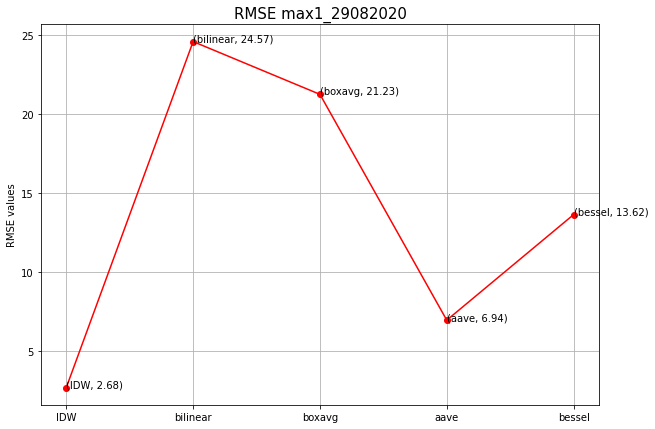

In [59]:
fig1 = plt.figure(figsize=(10,7))
ax = fig1.add_subplot(111)
plt.plot(models, arr, color='red', marker='o')
plt.title('RMSE max1_29082020', fontsize=15)
plt.ylabel('RMSE values')
plt.grid(True)  

for xy in zip(models, arr):                                     
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.show()

In [60]:
missing = [m, m1, m2, m3, m4, m5]
missing 

[0, 9, 889, 652, 66, 262]

In [61]:
d = {'Total Entries': df1, 'Missing Entries': missing}

In [62]:
df2 = pd.DataFrame(data=d)
df2

,Total Entries,Missing Entries
imd,1393,0
IDW,1384,9
bilinear,504,889
boxavg,741,652
aave,1327,66
bessel,1131,262


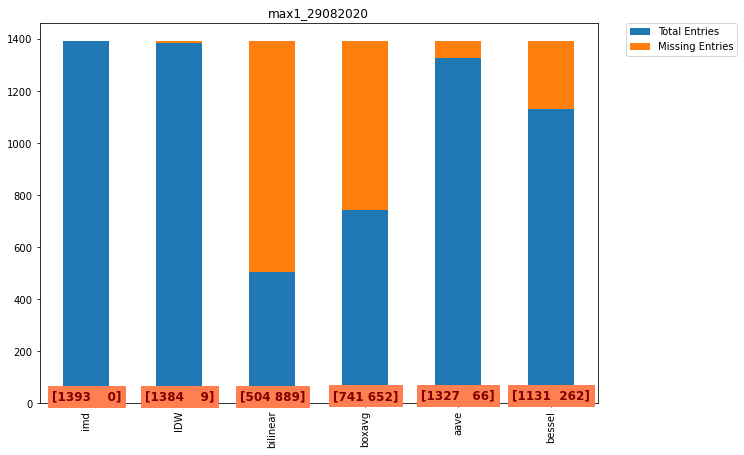

In [63]:
fig = df2.plot( kind = 'bar', stacked = True, title = 'max1_29082020', mark_right = True, figsize=(10,7))
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  

for index,df1 in enumerate(df2.values):
    plt.text(x = index , y = index , s=f"{df1}" , fontdict=dict(fontsize=12), backgroundcolor='coral', color ='maroon', fontweight = 'bold', va = 'bottom', ha = 'center')

In [64]:
fig.figure.savefig('C:\\cygwin64\\home\\Grid_data_IMD_Final\\diff_months\\aug_2020\\min_max29\\max1_29082020.png')

In [65]:
fig1.savefig('C:\\cygwin64\\home\\Grid_data_IMD_Final\\diff_months\\aug_2020\\min_max29\\max1_29082020_rmsegraph.png')